<h1>General Analysis of Suicide Rates</h1>

<p>Our aim is to make general analysis of suicide rates and we will explain these rates in detail.</p>

<p>

Dataset Feature List

<ul>
<li>country</li>
<li>year</li>
<li>sex</li>
<li>age</li>
<li>suicides_no</li>
<li>population</li>
<li>suicides/100k pop</li>
<li>country-year</li>
<li>HDI for year</li>
<li>gdp_for_year</li>
<li>gdp_per_capita</li>
<li>generation</li>

</ul>

</p>

<p><a href='#20'>References</a></p>
<p><a href='#21'>Conclusion</a></p>

<p>Last Updated : <b>30.06.2019</b></p>
<p><h2>if you like it, please upvoted</h2></p>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
#dataset read operation
#read_csv function is required to read the data.
data=pd.read_csv('./data/master.csv')
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
#Describe function includes analysis of all our numerical data. For this, count, mean, std, min,% 25,% 50,% 75, max values are given.
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [5]:
data.iloc[:,1:5].describe()

,year,suicides_no
count,27820.000000,27820.000000
mean,2001.258375,242.574407
std,8.469055,902.047917
min,1985.000000,0.000000
25%,1995.000000,3.000000
50%,2002.000000,25.000000
75%,2008.000000,131.000000
max,2016.000000,22338.000000


In [6]:
#The info function shows the data types and numerical values of the features in our data set.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [7]:
#We will now set the headings of the feature values in the data set.
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [8]:
#so,change the names of the column. Because there may be problems for future analysis.
data=data.rename(columns={'country':'Country','year':'Year','sex':'Gender','age':'Age','suicides_no':'SuicidesNo','population':'Population','suicides/100k pop':'Suicides100kPop','country-year':'CountryYear','HDI for year':'HDIForYear',' gdp_for_year ($) ':'GdpForYearMoney','gdp_per_capita ($)':'GdpPerCapitalMoney','generation':'Generation'})

In [9]:
data.columns

Index(['Country', 'Year', 'Gender', 'Age', 'SuicidesNo', 'Population',
       'Suicides100kPop', 'CountryYear', 'HDIForYear', 'GdpForYearMoney',
       'GdpPerCapitalMoney', 'Generation'],
      dtype='object')

In [10]:
#And, how many rows and columns are there for all data?
print('Data Shape :')
data.shape

Data Shape :


(27820, 12)

In [11]:
data.isnull().any()

Country               False
Year                  False
Gender                False
Age                   False
SuicidesNo            False
Population            False
Suicides100kPop       False
CountryYear           False
HDIForYear             True
GdpForYearMoney       False
GdpPerCapitalMoney    False
Generation            False
dtype: bool

In [12]:
data.isnull().values.any()

True

In [13]:
#Now,I will check null on all data and If data has null, I will sum of null data's. In this way, how many missing data is in the data.
data.isnull().sum()

Country                   0
Year                      0
Gender                    0
Age                       0
SuicidesNo                0
Population                0
Suicides100kPop           0
CountryYear               0
HDIForYear            19456
GdpForYearMoney           0
GdpPerCapitalMoney        0
Generation                0
dtype: int64

In [14]:
#As you can see, most of the HDIForYear value is empty. That's why I want this value deleted.
data=data.drop(['HDIForYear','CountryYear'],axis=1)

Min Year : 1985
Max Year : 2016


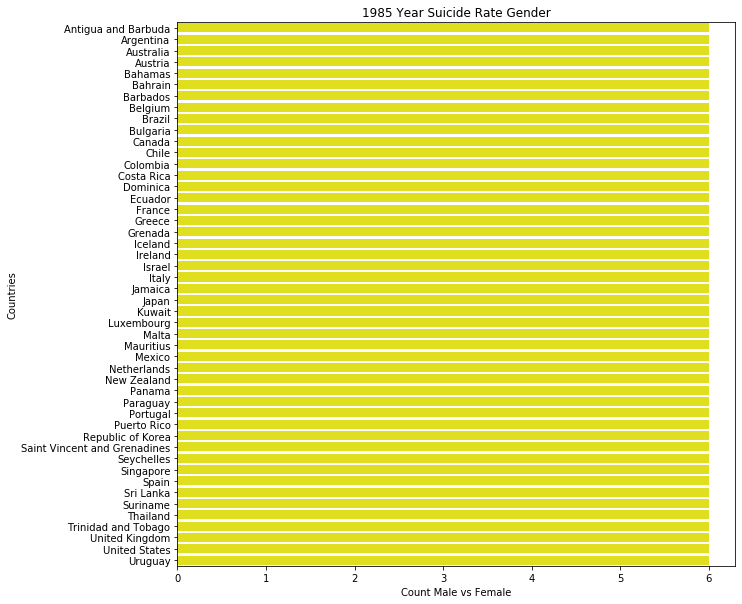

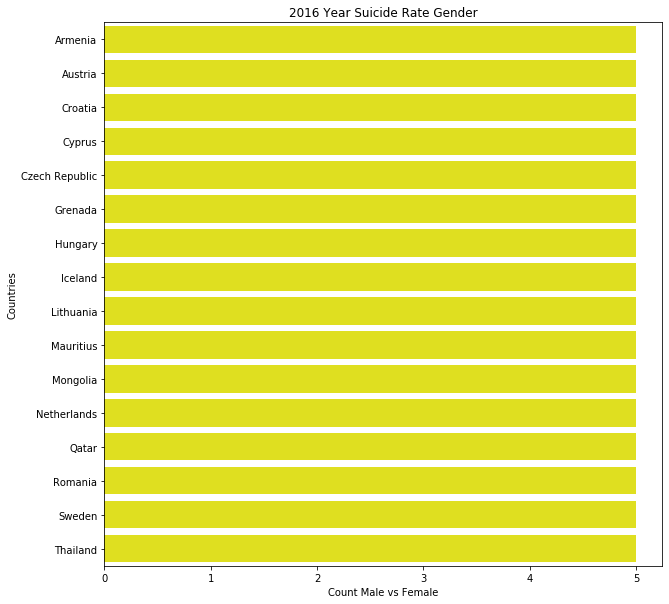

In [15]:
#Now start analysis, min year and max year will find them
min_year=min(data.Year)
max_year=max(data.Year)
print('Min Year :',min_year)
print('Max Year :',max_year)

#1985 min year,2016 max year.

data_country=data[(data['Year']==min_year)]

country_1985=data[(data['Year']==min_year)].Country.unique()
country_1985_male=[]
country_1985_female=[]

for country in country_1985:
    country_1985_male.append(len(data_country[(data_country['Country']==country)&(data_country['Gender']=='male')]))
    country_1985_female.append(len(data_country[(data_country['Country']==country)&(data_country['Gender']=='female')])) 
    
#We found the ratio of men and women who committed suicide in some countries in 1985 and we are now charting.

plt.figure(figsize=(10,10))
sns.barplot(y=country_1985,x=country_1985_male,color='red')
sns.barplot(y=country_1985,x=country_1985_female,color='yellow')
plt.ylabel('Countries')
plt.xlabel('Count Male vs Female')
plt.title('1985 Year Suicide Rate Gender')
plt.show()

#Very odd all the rates came on an equal level. So let's do max year.

data_country=data[(data['Year']==max_year)]

country_2016=data[(data['Year']==max_year)].Country.unique()
country_2016_male=[]
country_2016_female=[]

for country in country_2016:
    country_2016_male.append(len(data_country[(data_country['Country']==country)&(data_country['Gender']=='male')]))
    country_2016_female.append(len(data_country[(data_country['Country']==country)&(data_country['Gender']=='female')])) 
    
#We found the ratio of men and women who committed suicide in some countries in 1985 and we are now charting.

plt.figure(figsize=(10,10))
sns.barplot(y=country_2016,x=country_2016_male,color='red')
sns.barplot(y=country_2016,x=country_2016_female,color='yellow')
plt.ylabel('Countries')
plt.xlabel('Count Male vs Female')
plt.title('2016 Year Suicide Rate Gender')
plt.show()

<p>While the suicide rate was widespread in more countries in 1985, this ratio has fallen considerably in 2016. Now let us examine the other features of these countries.</p>

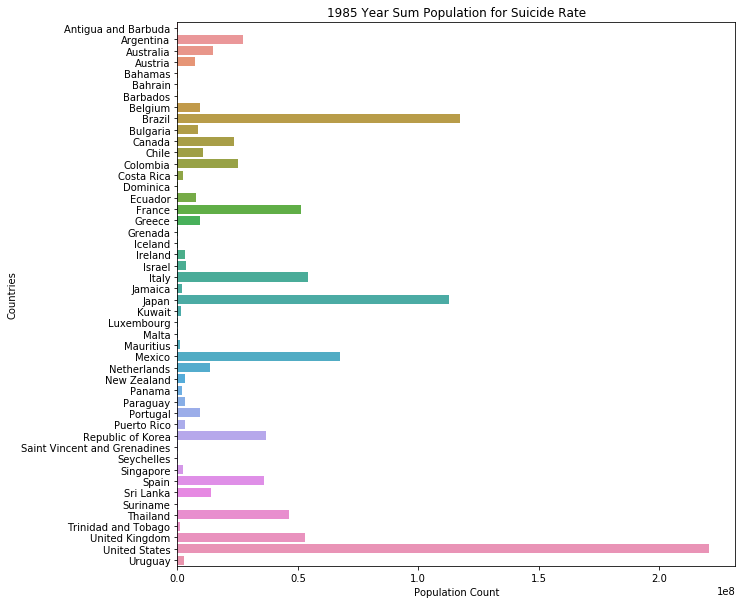

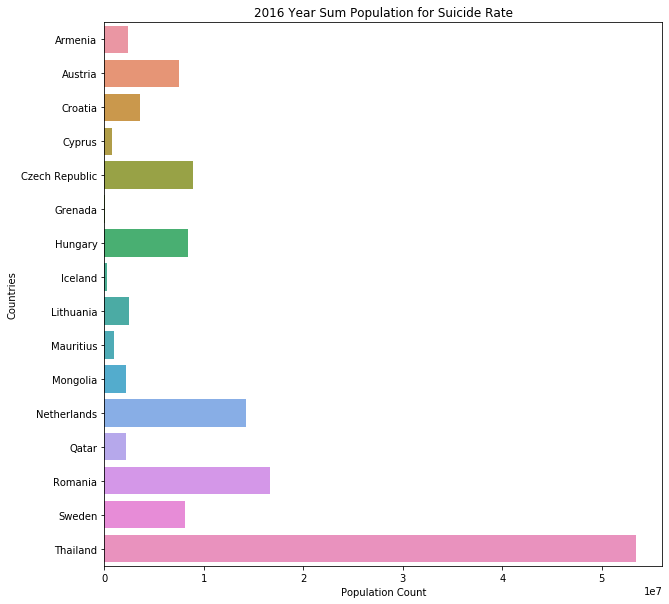

In [16]:
data_country=data[(data['Year']==min_year)]

country_1985_population=[]

for country in country_1985:
    country_1985_population.append(sum(data_country[(data_country['Country']==country)].Population))    

#Now year 1985 find sum population every country

plt.figure(figsize=(10,10))
sns.barplot(y=country_1985,x=country_1985_population)
plt.xlabel('Population Count')
plt.ylabel('Countries')
plt.title('1985 Year Sum Population for Suicide Rate')
plt.show()

#######################################################

data_country=data[(data['Year']==max_year)]

country_2016_population=[]

for country in country_2016:
    country_2016_population.append(sum(data_country[(data_country['Country']==country)].Population))    

#Now year 1985 find sum population every country

plt.figure(figsize=(10,10))
sns.barplot(y=country_2016,x=country_2016_population)
plt.xlabel('Population Count')
plt.ylabel('Countries')
plt.title('2016 Year Sum Population for Suicide Rate')
plt.show()


<p>The values we found on the upper side give the total population we found in 1985 in 2016.</p>

In [17]:
suicideGender1985=data_country.groupby(['Country','Gender']).SuicidesNo.sum()

In [18]:
suicideGender1985

Country         Gender
Armenia         female      14
                male        53
Austria         female     295
                male       906
Croatia         female     168
                male       515
Cyprus          female       5
                male        31
Czech Republic  female     258
                male      1060
Grenada         female       0
                male         0
Hungary         female     446
                male      1315
Iceland         female       4
                male        36
Lithuania       female     129
                male       693
Mauritius       female      15
                male        83
Mongolia        female      52
                male       371
Netherlands     female     613
                male      1273
Qatar           female       5
                male        63
Romania         female     310
                male      1643
Sweden          female     348
                male       782
Thailand        female     842
                

In [19]:
data_country=data[(data['Year']==min_year)]

data_age_5_14=[]
data_age_15_24=[]
data_age_25_34=[]
data_age_35_54=[]
data_age_55_74=[]
data_age_75=[]

for country in country_1985:
        data_age_5_14.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='5-14 years')]))
        data_age_15_24.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='15-24 years')]))
        data_age_25_34.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='25-34 years')]))
        data_age_35_54.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='35-54 years')]))
        data_age_55_74.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='55-74 years')]))
        data_age_75.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='75+ years')]))
        

#######################################################

data_country=data[(data['Year']==max_year)]

data_age_5_14=[]
data_age_15_24=[]
data_age_25_34=[]
data_age_35_54=[]
data_age_55_74=[]
data_age_75=[]

for country in country_2016:
        data_age_5_14.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='5-14 years')]))
        data_age_15_24.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='15-24 years')]))
        data_age_25_34.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='25-34 years')]))
        data_age_35_54.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='35-54 years')]))
        data_age_55_74.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='55-74 years')]))
        data_age_75.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='75+ years')]))
        
#there is an equal rate. We need to make the query process a little more complicated.

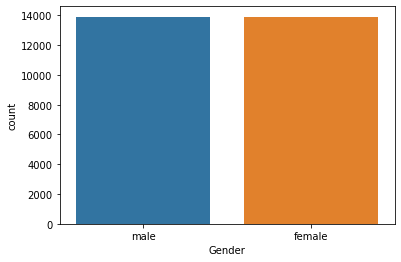

In [20]:
sns.countplot(data.Gender)
plt.show()
#there has been an even gender distribution.

In [21]:
data.head()

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides100kPop,GdpForYearMoney,GdpPerCapitalMoney,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [22]:
data['GdpPerCapitalMoney'].unique()

array([ 796,  769,  833, ..., 1964, 2150, 2309])

In [23]:
print("Max : ",max(data['GdpPerCapitalMoney'].unique()))
print('Min : ',min(data['GdpPerCapitalMoney'].unique()))

Max :  126352
Min :  251


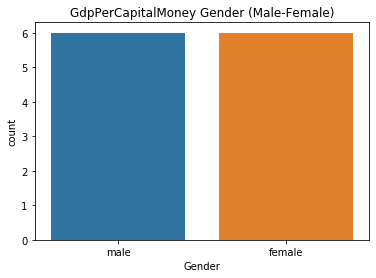

In [24]:
sns.countplot(data[data['GdpPerCapitalMoney']==251].Gender)
plt.title("GdpPerCapitalMoney Gender (Male-Female)")
plt.show()

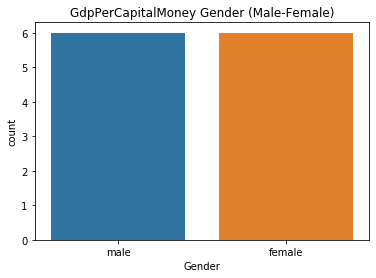

In [25]:
sns.countplot(data[data['GdpPerCapitalMoney']==126352].Gender)
plt.title("GdpPerCapitalMoney Gender (Male-Female)")
plt.show()

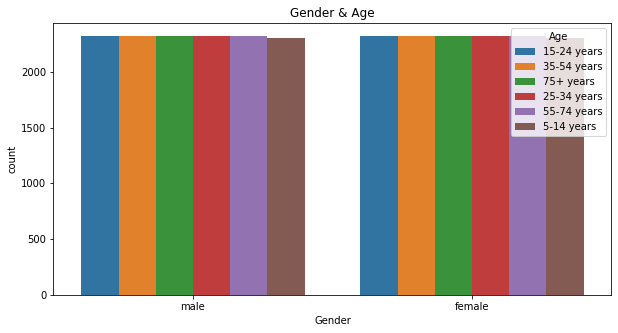

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(data.Gender,hue=data.Age)
plt.title('Gender & Age')
plt.show()
#there has been an even gender & hue age distribution.

In [27]:
data.groupby('Age')['Gender'].count()

Age
15-24 years    4642
25-34 years    4642
35-54 years    4642
5-14 years     4610
55-74 years    4642
75+ years      4642
Name: Gender, dtype: int64

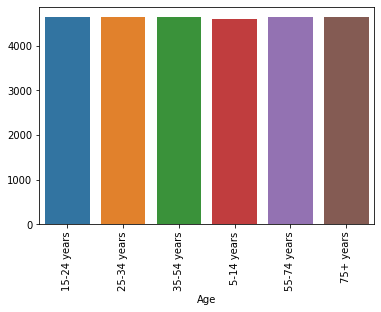

In [28]:
sns.barplot(x=data.groupby('Age')['Gender'].count().index,y=data.groupby('Age')['Gender'].count().values)
plt.xticks(rotation=90)
plt.show()

In [29]:
suicidesNo=[]
for country in data.Country.unique():
    suicidesNo.append(sum(data[data['Country']==country].SuicidesNo))   

In [30]:
suicidesNo=pd.DataFrame(suicidesNo,columns=['suicidesNo'])
country=pd.DataFrame(data.Country.unique(),columns=['country'])
data_suicide_countr=pd.concat([suicidesNo,country],axis=1)
#sns.barplot(x=data.Country.unique(),y=suicidesNo) 
#plt.show()

In [31]:
data_suicide_countr=data_suicide_countr.sort_values(by='suicidesNo',ascending=False)

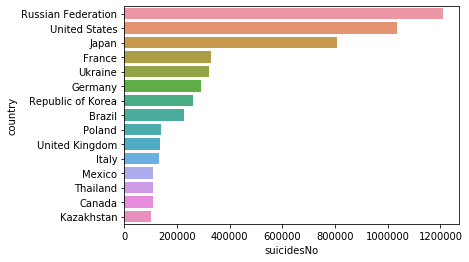

In [32]:
sns.barplot(y=data_suicide_countr.country[:15],x=data_suicide_countr.suicidesNo[:15])
plt.show()

<p>It appears that after examining our data, we examined the total suicide rates and prepared a chart that handled the most from the least.</p>

In [33]:
grouop_data=data.groupby(['Age','Gender'])['SuicidesNo'].sum().unstack()
grouop_data=grouop_data.reset_index().melt(id_vars='Age')

In [34]:
grouop_data_female=grouop_data.iloc[:6,:]
grouop_data_male=grouop_data.iloc[6:,:]

In [35]:
grouop_data_female

,Age,Gender,value
0,15-24 years,female,175437
1,25-34 years,female,208823
2,35-54 years,female,506233
3,5-14 years,female,16997
4,55-74 years,female,430036
5,75+ years,female,221984


In [36]:
grouop_data_male

,Age,Gender,value
6,15-24 years,male,633105
7,25-34 years,male,915089
8,35-54 years,male,1945908
9,5-14 years,male,35267
10,55-74 years,male,1228407
11,75+ years,male,431134


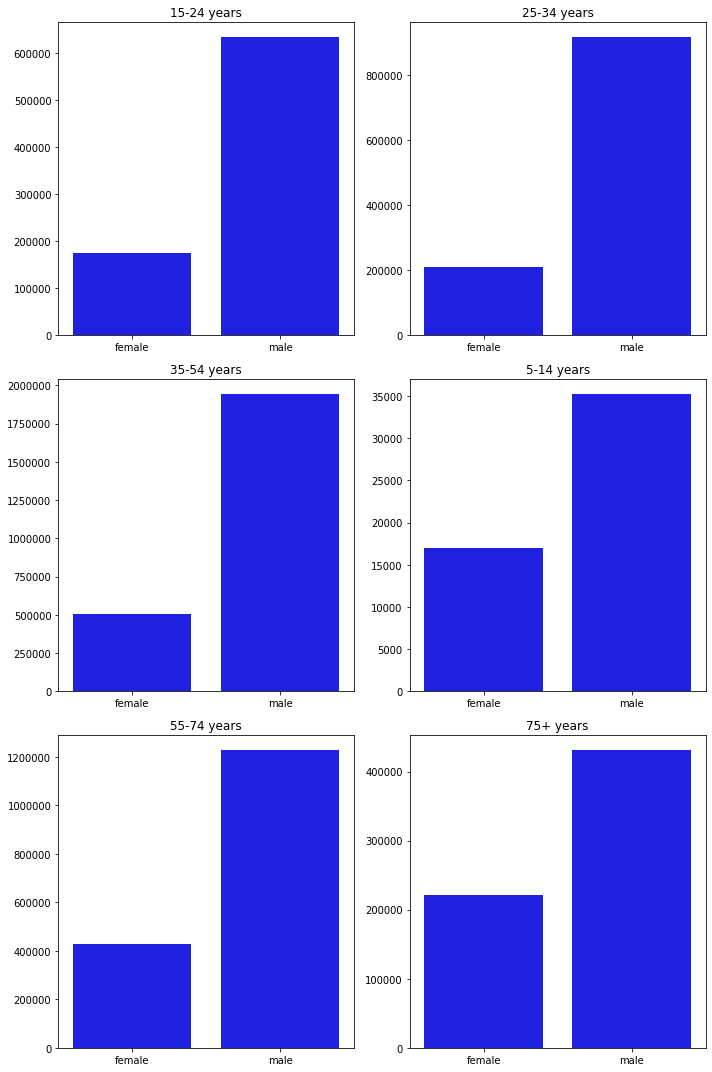

In [37]:
female_=[175437,208823,506233,16997,430036,221984]
male_=[633105,915089,1945908,35267,1228407,431134]
plot_id = 0
for i,age in enumerate(['15-24 years','25-34 years','35-54 years','5-14 years','55-74 years','75+ years']):
    plot_id += 1
    plt.subplot(3,2,plot_id)
    plt.title(age)
    fig, ax = plt.gcf(), plt.gca()
    sns.barplot(x=['female','male'],y=[female_[i],male_[i]],color='blue')
    plt.tight_layout()
    fig.set_size_inches(10, 15)
plt.show()  

<p>All data were analyzed. Graphical analysis was performed for all age rates for suicide rates.</p>

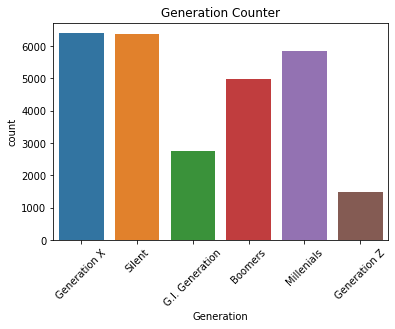

In [38]:
sns.countplot(data.Generation)
plt.title('Generation Counter')
plt.xticks(rotation=45)
plt.show()

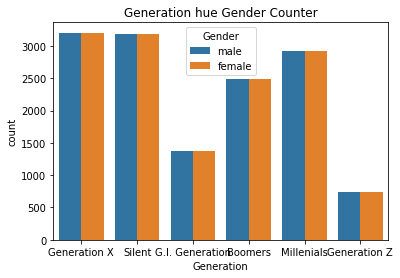

In [39]:
sns.countplot(data.Generation,hue=data.Gender)
plt.title('Generation hue Gender Counter')
plt.show()

In [40]:
data['Age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

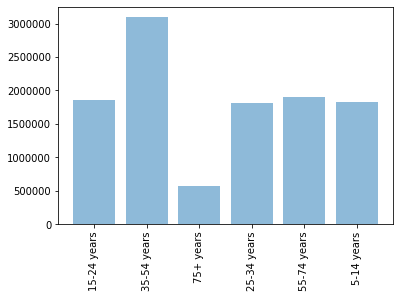

In [41]:
index_population=[]
for age in data['Age'].unique():
    index_population.append(sum(data[data['Age']==age].Population)/len(data[data['Age']==age].Population))
    
plt.bar(['15-24 years','35-54 years','75+ years','25-34 years','55-74 years','5-14 years'],index_population,align='center',alpha=0.5)
plt.xticks(rotation=90)
plt.show()

In [42]:
index_population

[1861901.5286514433,
 3096916.8726841877,
 573735.728780698,
 1817773.284575614,
 1896433.7225333909,
 1821842.3507592191]

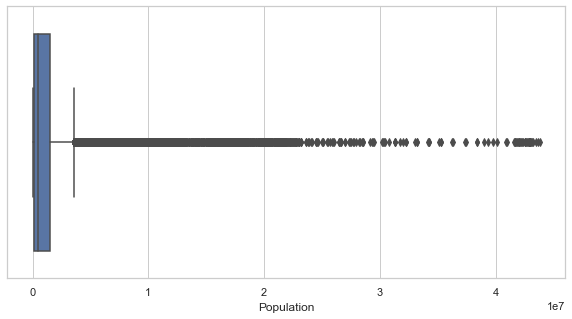

In [43]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.boxplot(data['Population'])
plt.show()

In [44]:
data.head()

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides100kPop,GdpForYearMoney,GdpPerCapitalMoney,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


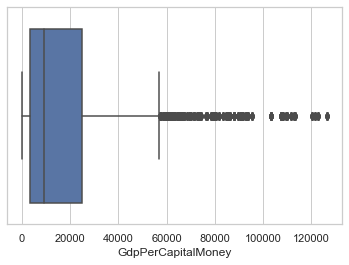

In [45]:
sns.set(style='whitegrid')
sns.boxplot(data['GdpPerCapitalMoney'])
plt.show()

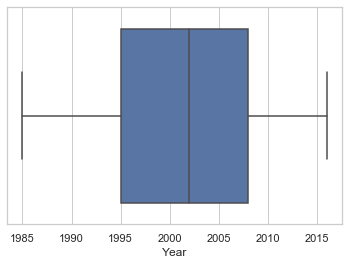

In [46]:
sns.set(style='whitegrid')
sns.boxplot(data.Year)
plt.show()

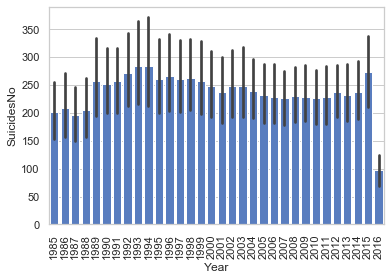

In [47]:
# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Year", y="SuicidesNo", data=data,
            label="Year Suicides", color="b")
plt.xticks(rotation=90)
plt.show()

<Figure size 504x504 with 0 Axes>

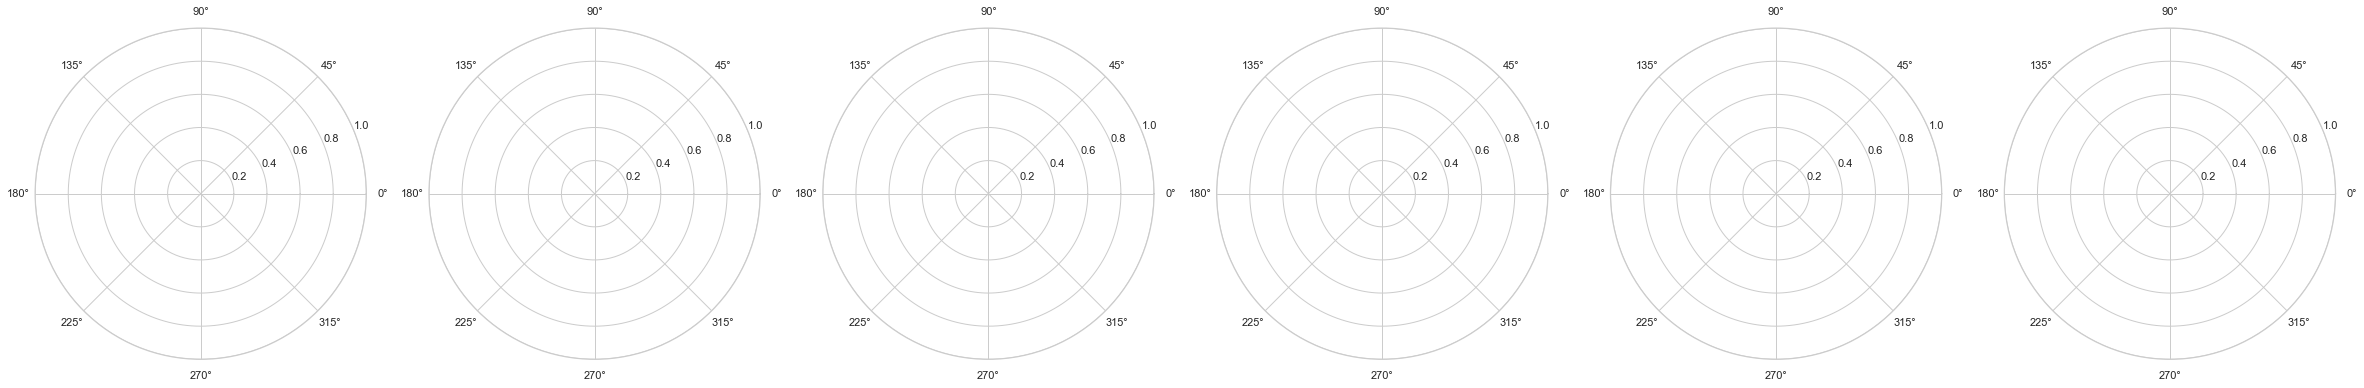

In [48]:

plt.figure(figsize=(7,7))
g = sns.FacetGrid(data, col="Generation", hue="Year",
                  subplot_kws=dict(projection='polar'), height=5.5,
                  sharex=False, sharey=False, despine=False)

plt.show()

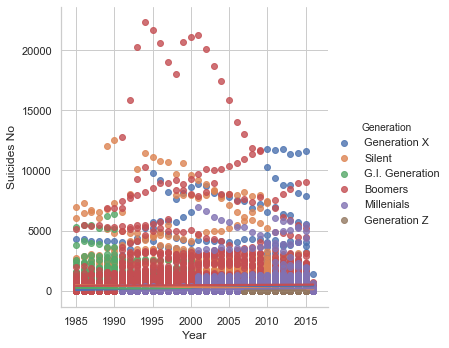

In [49]:
# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="Year", y="SuicidesNo", hue="Generation",
               truncate=True, height=5, data=data)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Year", "Suicides No")
plt.show()

In [50]:
data.head()

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides100kPop,GdpForYearMoney,GdpPerCapitalMoney,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


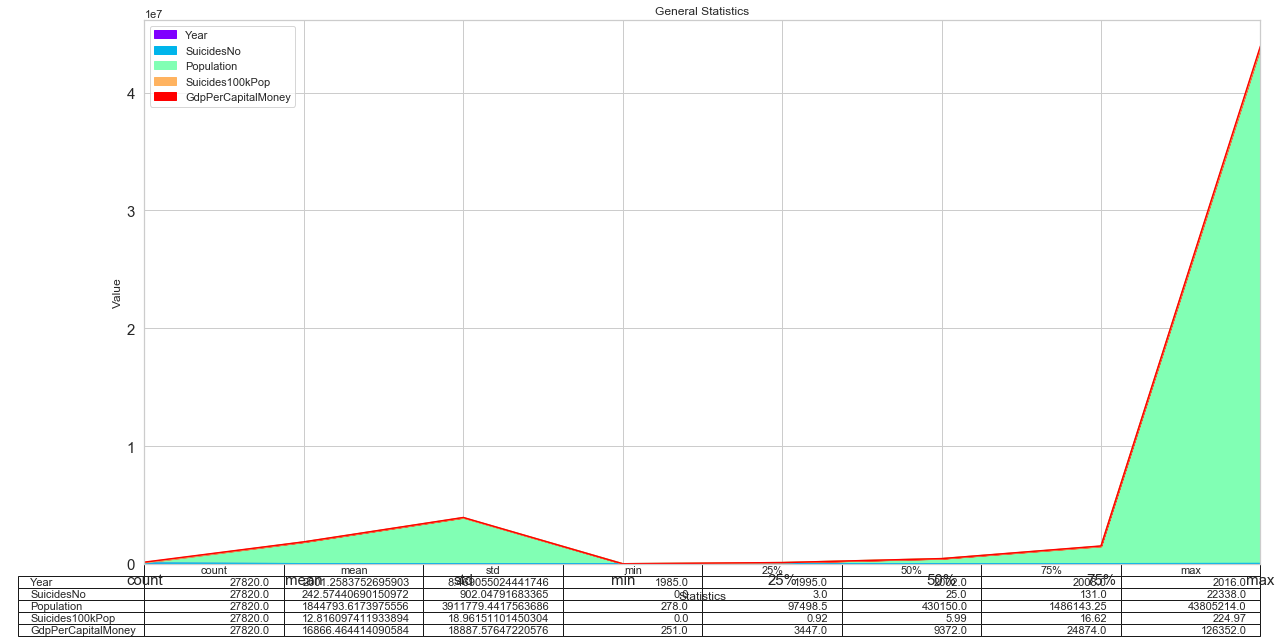

In [51]:
data.describe().plot(kind = "Area",fontsize=15, figsize = (20,10), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics")
plt.show()

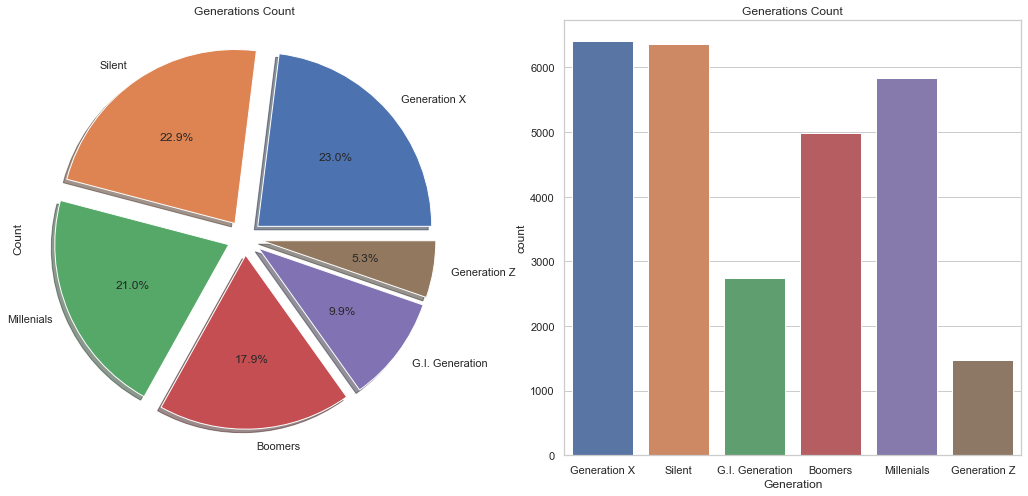

In [52]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Generation'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Generations Count')
ax[0].set_ylabel('Count')
sns.countplot('Generation',data=data,ax=ax[1])
ax[1].set_title('Generations Count')
plt.show()

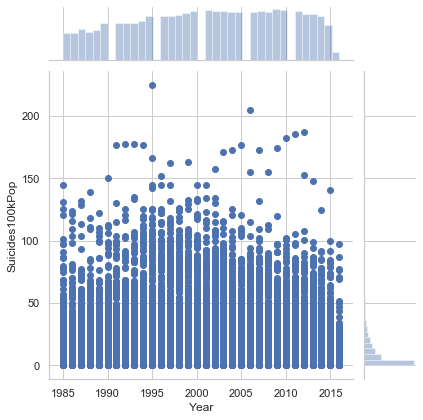

In [53]:
fig=sns.jointplot(y='Suicides100kPop',x='Year',data=data)
plt.show()

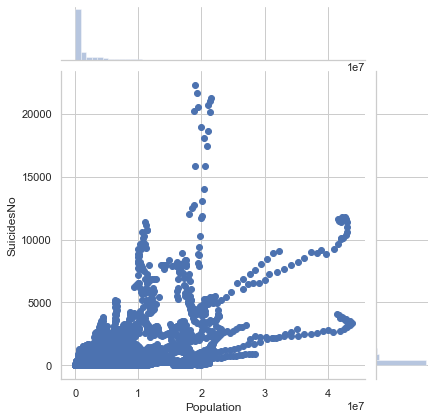

In [54]:
fig=sns.jointplot(y='SuicidesNo',x='Population',data=data)
plt.show()

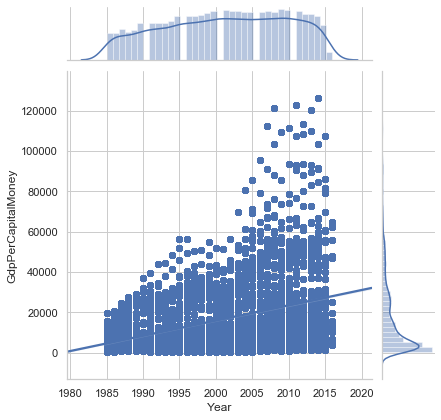

In [55]:
sns.jointplot("Year", "GdpPerCapitalMoney", data=data, kind="reg")
plt.show()

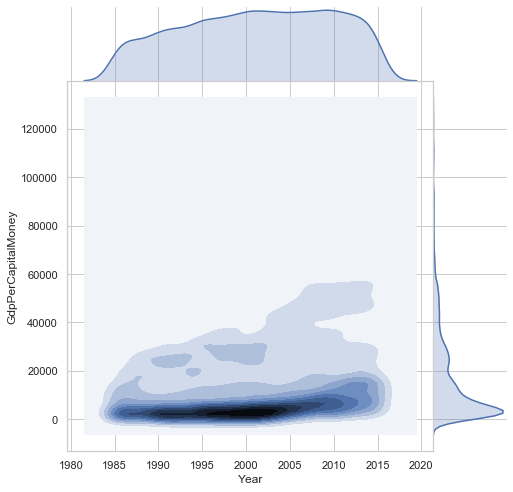

In [56]:
# Show the joint distribution using kernel density estimation
g = sns.jointplot(data.Year,data.GdpPerCapitalMoney, kind="kde", height=7, space=0)
plt.show()

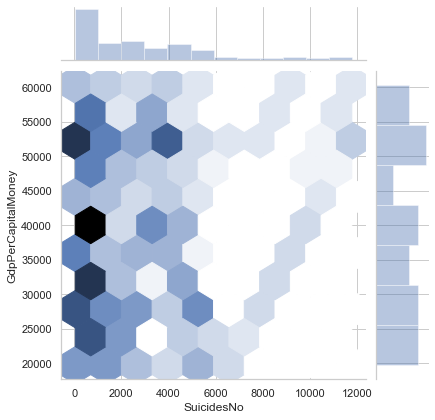

In [57]:
fig=sns.jointplot(y='GdpPerCapitalMoney',x='SuicidesNo',kind='hex',data=data[data['Country']=='United States'])
plt.show()

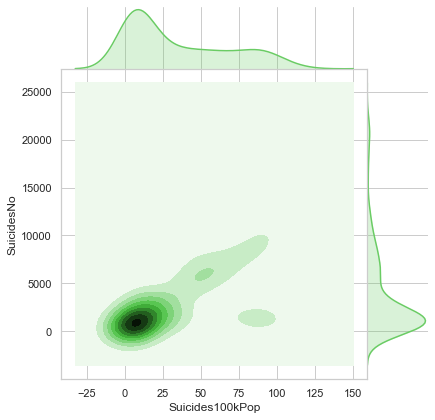

In [58]:
sns.jointplot("Suicides100kPop", "SuicidesNo", data=data[data['Country']=='Russian Federation'], kind="kde",space=0,color='g')
plt.show()

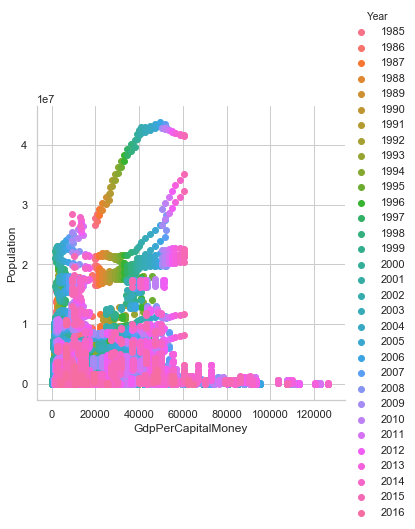

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.FacetGrid(data,hue='Year',size=5).map(plt.scatter,'GdpPerCapitalMoney','Population').add_legend()
plt.show()

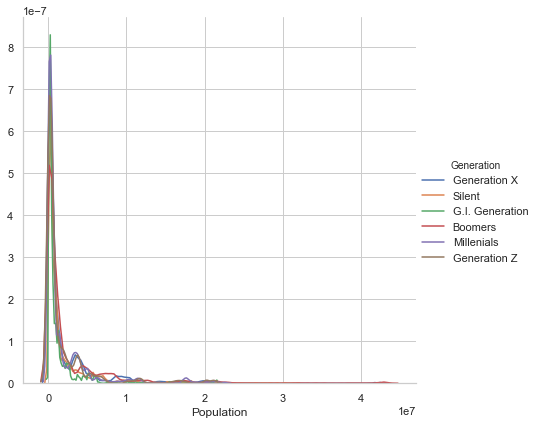

In [60]:
sns.FacetGrid(data, hue="Generation", size=6).map(sns.kdeplot, "Population").add_legend()
plt.ioff() 
plt.show()

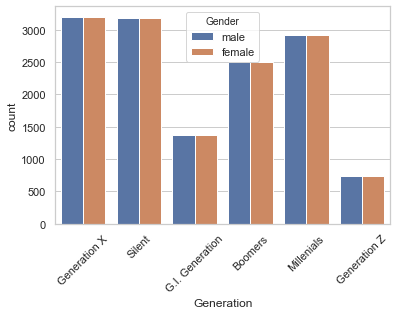

In [61]:
sns.countplot(x="Generation", hue="Gender",
                 data=data)
plt.xticks(rotation=45)
plt.show()

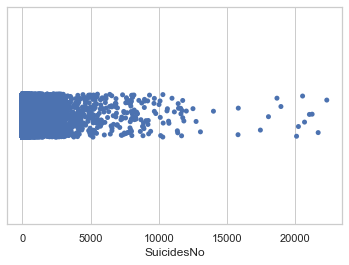

In [62]:
sns.stripplot(x=data['SuicidesNo'])
plt.show()

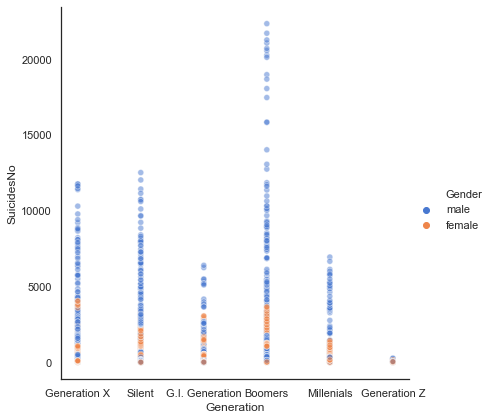

In [63]:
sns.set(style="white")
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Generation",y="SuicidesNo",hue="Gender",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)
plt.show()

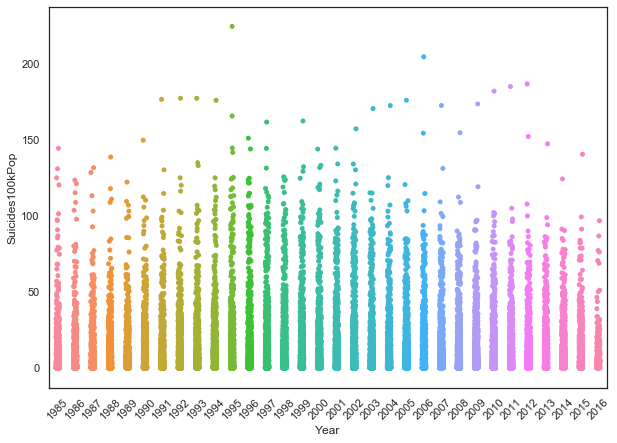

In [64]:
plt.figure(figsize=(10,7))
sns.stripplot(x="Year",y='Suicides100kPop',data=data)
plt.xticks(rotation=45)
plt.show()

<Figure size 720x720 with 0 Axes>

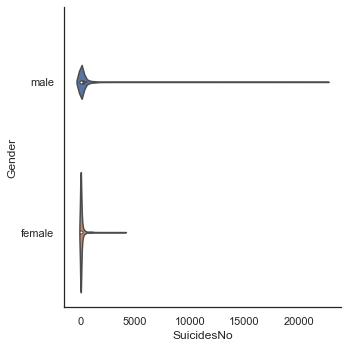

In [65]:
plt.figure(figsize=(10,10))
sns.factorplot(x="SuicidesNo", y="Gender", kind='violin',data=data)
plt.show()

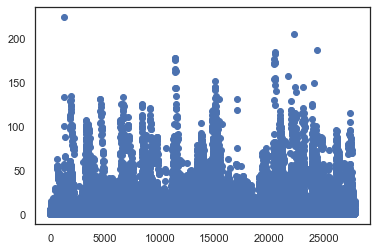

In [66]:
plt.scatter(x=np.arange(1,27821),y=data['Suicides100kPop'].values.tolist())
plt.show()

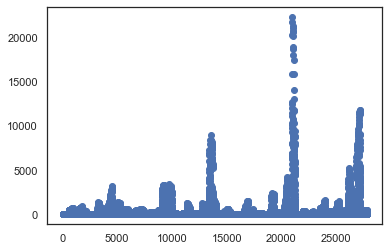

In [67]:
plt.scatter(x=np.arange(1,27821),y=data['SuicidesNo'].values.tolist())
plt.show()

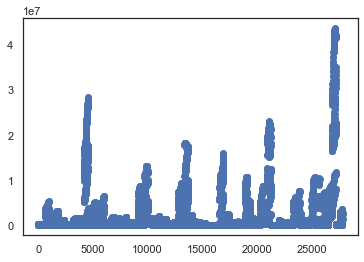

In [68]:
plt.scatter(x=np.arange(1,27821),y=data['Population'].values.tolist())
plt.show()

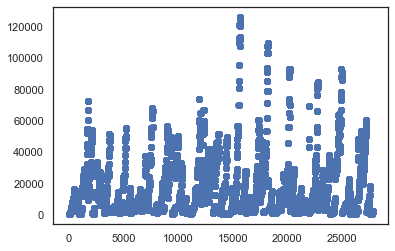

In [69]:
plt.scatter(x=np.arange(1,27821),y=data['GdpPerCapitalMoney'].values.tolist())
plt.show()

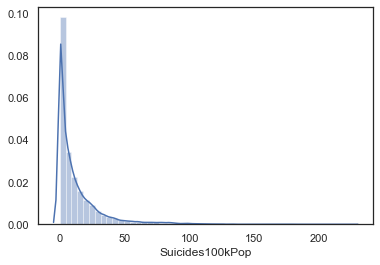

In [70]:
sns.distplot(data['Suicides100kPop'])
plt.show()

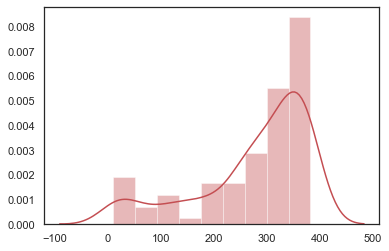

In [71]:
sns.set_color_codes()
sns.distplot(data['Country'].value_counts().values,color='r')
plt.show()

In [72]:
data[(data['Gender']=='male')].Age.value_counts().values

array([2321, 2321, 2321, 2321, 2321, 2305])

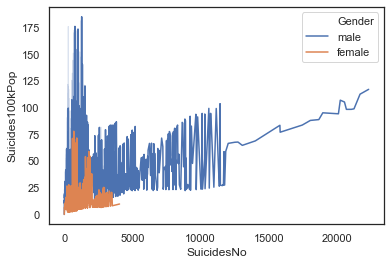

In [73]:
# Plot the responses for different events and regions
sns.lineplot(x="SuicidesNo", y="Suicides100kPop",
             hue="Gender",data=data.sort_values(by='Suicides100kPop',ascending=False))
plt.show()

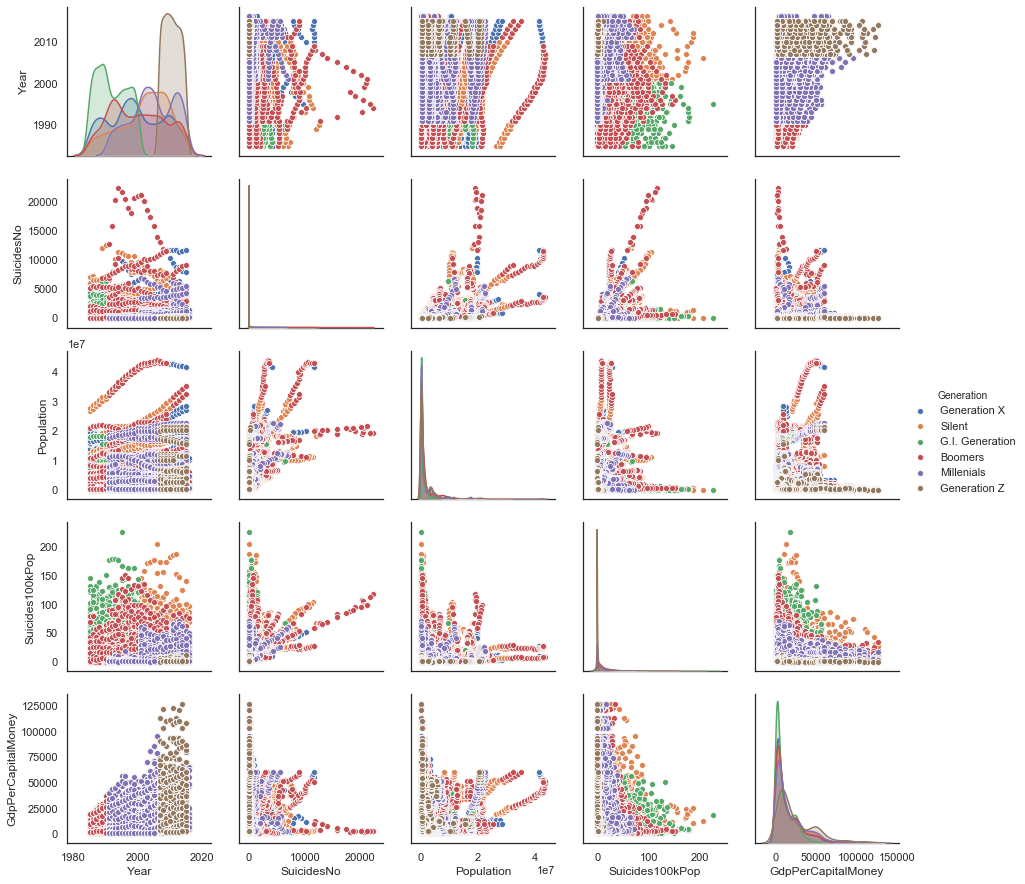

In [74]:
sns.pairplot(data,hue='Generation')
plt.show()

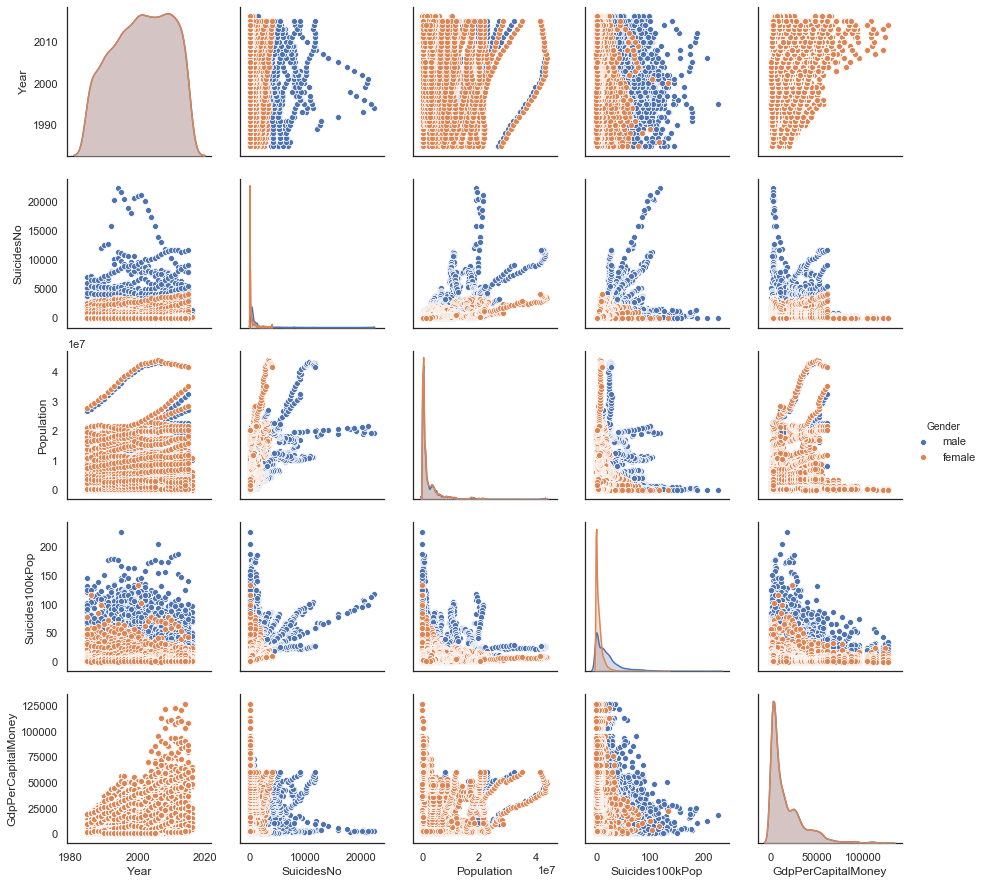

In [75]:
sns.pairplot(data, hue="Gender")
plt.show()

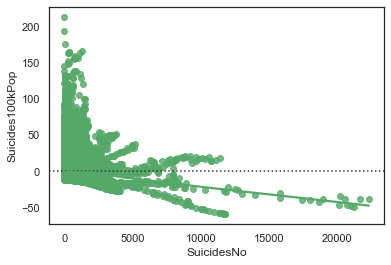

In [76]:
# Plot the residuals after fitting a linear model
sns.residplot('SuicidesNo','Suicides100kPop', data=data,lowess=True, color="g")
plt.show()

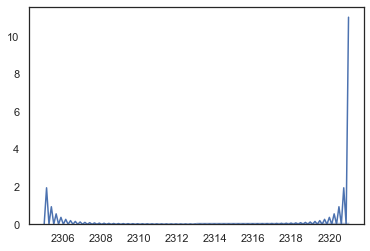

In [77]:
sns.distplot(data[(data['Gender']=='female')].Age.value_counts().values)
plt.show()

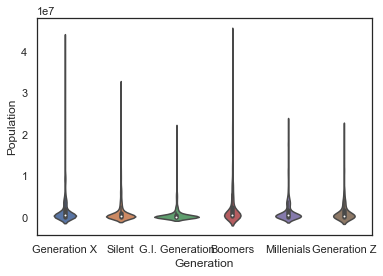

In [78]:
sns.violinplot(x=data['Generation'],y=data['Population'])
plt.show()

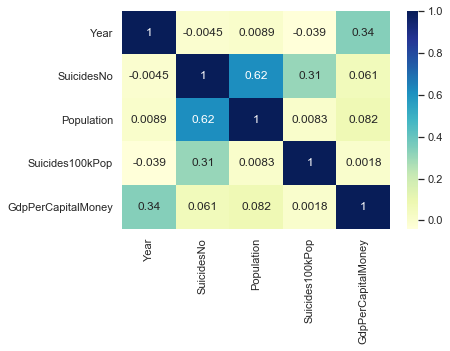

In [79]:
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)
plt.show()

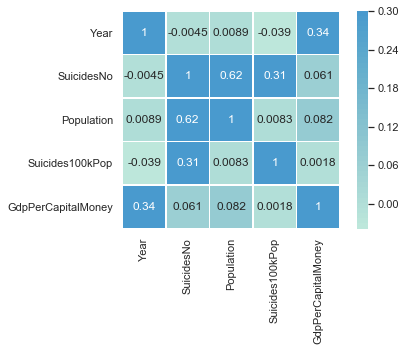

In [80]:
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data.corr(), vmax=.3, center=1,
            square=True, linewidths=.5,annot=True)
plt.show()

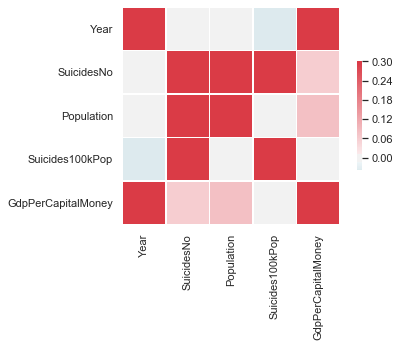

In [81]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data.corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

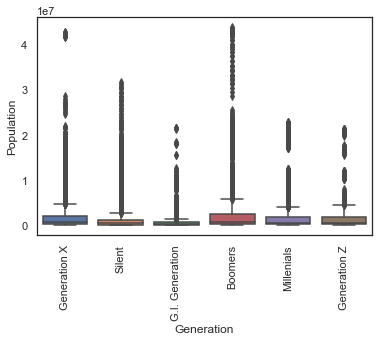

In [82]:
sns.boxplot(x=data['Generation'],y=data['Population'])
plt.xticks(rotation=90)

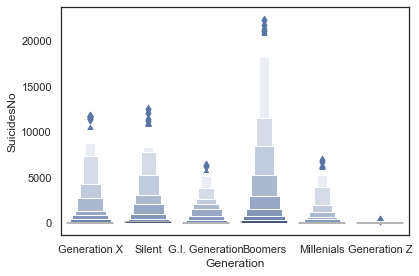

In [83]:
sns.boxenplot(x="Generation", y="SuicidesNo",
              color="b",
              scale="linear", data=data)
plt.tight_layout()
plt.show()

In [84]:
data.head()

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides100kPop,GdpForYearMoney,GdpPerCapitalMoney,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [85]:
max(data.SuicidesNo)

22338

In [86]:
min(data.SuicidesNo)

0

In [87]:
data[data.SuicidesNo==max(data.SuicidesNo)]

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides100kPop,GdpForYearMoney,GdpPerCapitalMoney,Generation
20996,Russian Federation,1994,male,35-54 years,22338,19044200,117.3,"395,077,301,248",2853,Boomers


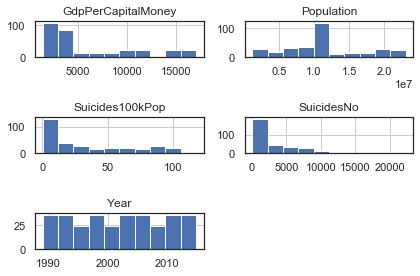

In [88]:
data[data['Country']=='Russian Federation'].hist()
plt.tight_layout()
plt.show()

In [89]:
data[data.SuicidesNo==min(data.SuicidesNo)]

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides100kPop,GdpForYearMoney,GdpPerCapitalMoney,Generation
9,Albania,1987,female,5-14 years,0,311000,0.0,"2,156,624,900",796,Generation X
10,Albania,1987,female,55-74 years,0,144600,0.0,"2,156,624,900",796,G.I. Generation
11,Albania,1987,male,5-14 years,0,338200,0.0,"2,156,624,900",796,Generation X
22,Albania,1988,female,5-14 years,0,317200,0.0,"2,126,000,000",769,Generation X
23,Albania,1988,male,5-14 years,0,345000,0.0,"2,126,000,000",769,Generation X
33,Albania,1989,female,5-14 years,0,321900,0.0,"2,335,124,988",833,Generation X
34,Albania,1989,female,75+ years,0,37000,0.0,"2,335,124,988",833,G.I. Generation
35,Albania,1989,male,5-14 years,0,349700,0.0,"2,335,124,988",833,Generation X
44,Albania,1992,female,5-14 years,0,336700,0.0,"709,452,584",251,Millenials
45,Albania,1992,female,75+ years,0,38700,0.0,"709,452,584",251,G.I. Generation


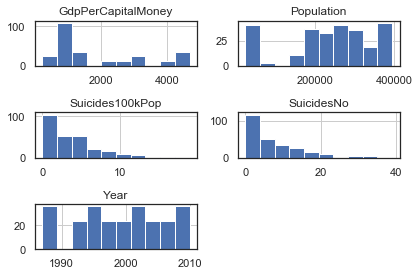

In [90]:
data[data['Country']=='Albania'].hist()
plt.tight_layout()
plt.show()

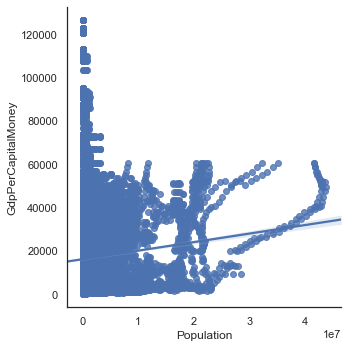

In [91]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="Population", y="GdpPerCapitalMoney", data=data)
plt.show()

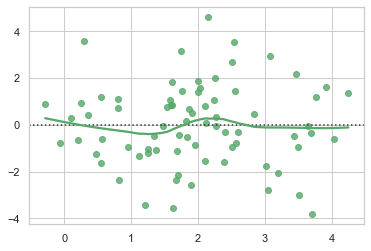

In [92]:
sns.set(style="whitegrid")

# Make an example dataset with y ~ x
rs = np.random.RandomState(7)
x = rs.normal(2, 1, 75)
y = 2 + 1.5 * x + rs.normal(0, 2, 75)

# Plot the residuals after fitting a linear model
sns.residplot(x, y, lowess=True, color="g")
plt.show()

In [93]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.iloc[:,-1]=le.fit_transform(data.iloc[:,-1])

In [94]:
data.head(2)

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides100kPop,GdpForYearMoney,GdpPerCapitalMoney,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,2
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,5


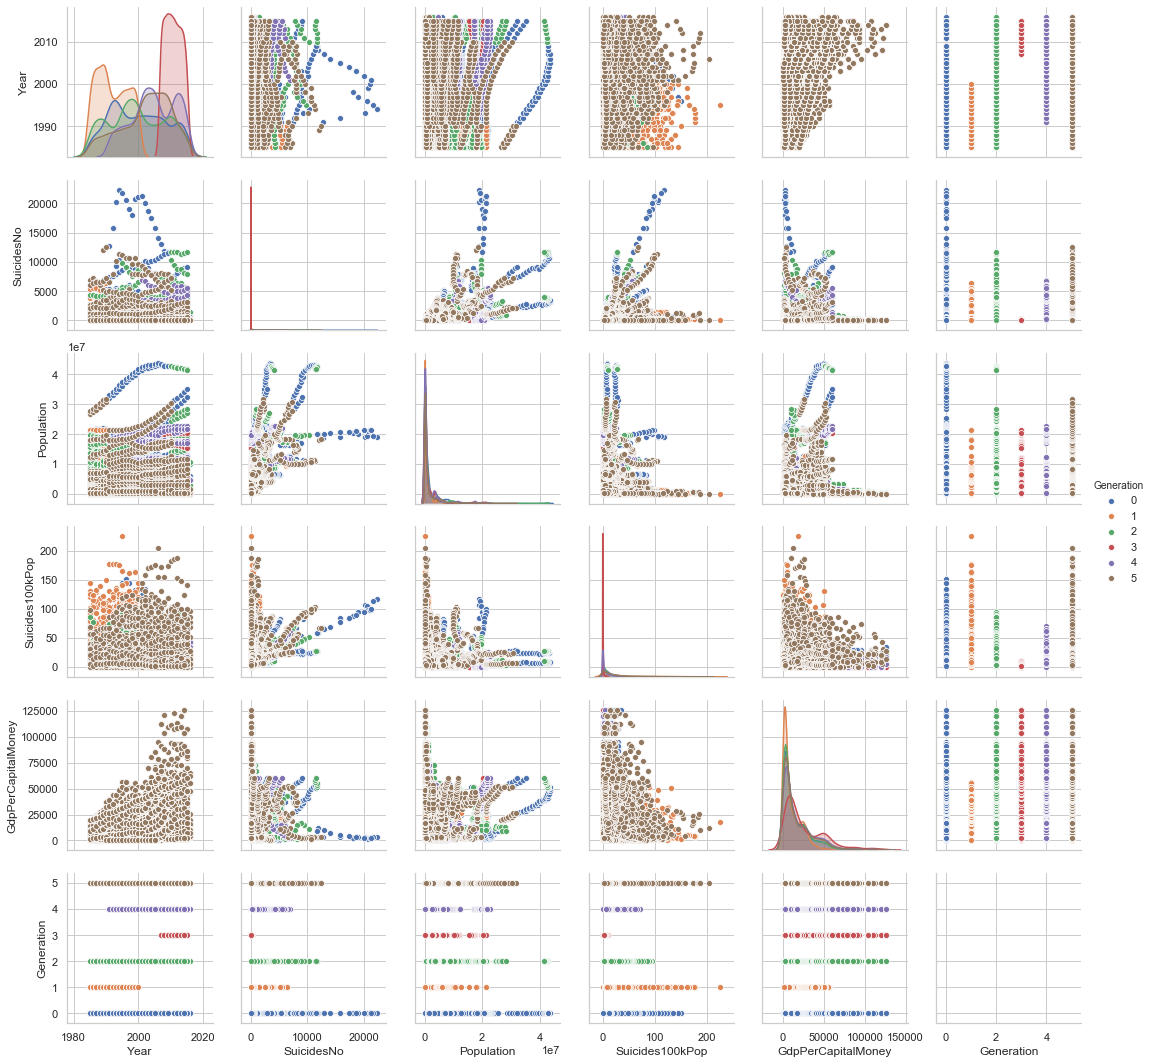

In [95]:
sns.pairplot(data, hue="Generation")
plt.show()

<p id='20'><h3><b>References</b></h3></p>
<p>https://www.kaggle.com/spscientist/students-performance-in-exams</p>
<p>https://seaborn.pydata.org/</p>
<p>https://www.kaggle.com/kanncaa1/seaborn-tutorial-for-beginners</p>
<p>https://www.kaggle.com/biphili/seaborn-plot-to-visualize-iris-data</p>
<p>https://www.kaggle.com/kralmachine/seaborn-tutorial-for-beginners</p>

<p id='21'><h3><b>Conclusion</b></h3></p>
<p>As a result, we have explained the seaborn library in a very detailed way and created a wide variety of graphs. If you like it, I expect your support. If you like <b>UPVOTED</b> I would be very happy if you do. If you have any questions, I am ready to answer your questions. At the bottom there are the kernel values that I have already done.</p>
<p>https://www.kaggle.com/kralmachine/data-visualization-of-suicide-rates</p>
<p>https://www.kaggle.com/kralmachine/gradient-admission-eda-ml-0-92</p>
<p>https://www.kaggle.com/kralmachine/football-results-from-1872-to-2018-datavisulation</p>
<p>https://www.kaggle.com/kralmachine/pandas-tutorial-for-beginner</p>
<p>https://www.kaggle.com/kralmachine/visual-analysis-of-world-happiness-in-2015</p>